<a href="https://colab.research.google.com/github/6058ah/BusinessCapstone/blob/master/2%EC%B0%A8%EC%A0%84%EC%A7%80_etf_%EC%A2%85%EB%AA%A9_%EC%B6%94%EC%B6%9C_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2차전지 ETF 종목 코드 추출

In [1]:
!pip install pykrx

In [2]:
from pykrx import stock
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

tickers = stock.get_etf_ticker_list('20210416')
tickers = pd.DataFrame(tickers,columns = ['종목코드'])

url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df=df[['itemcode','itemname']]
df=df.rename(columns={'itemcode':'종목코드','itemname':'종목명'})

etf = pd.merge(left = tickers, right = df, how = 'left', on= '종목코드')
battery_etf = etf[etf['종목명'].str.contains('2차전지')]
battery_etf = battery_etf.drop(index=124)
battery_etf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


,종목코드,종목명
118,305540,TIGER 2차전지테마
247,305720,KODEX 2차전지산업


##국내 산업 2차전지 관련 ETF는 'TIGER 2차전지테마', 'KODEX 2차전지산업', 'TIGER KRX2차전지K-뉴딜' 총 3가지


#2차전지 ETF 주가차트

## TIGER KRX2차전지K-뉴딜은 상장된지 오래되지 않아서 제외



In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


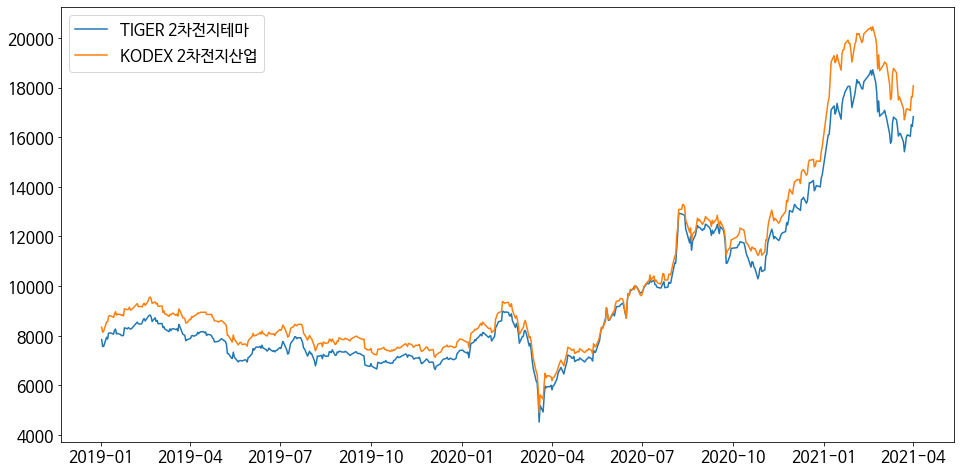

In [5]:
stocks = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  price = stock.get_etf_ohlcv_by_date("20190101","202104016",b)
  stocks[a]=price['종가'].values[:].tolist()
prices = pd.DataFrame(stocks)
prices.index = price.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(prices)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt.show()

#괴리율 확인
## 실제 ETF가 보유한 순자산 가치와 ETF 주가가 얼마나 차이 나는 지 보는 지표
## pykrx에서 ETF 괴리율 정보 제공

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


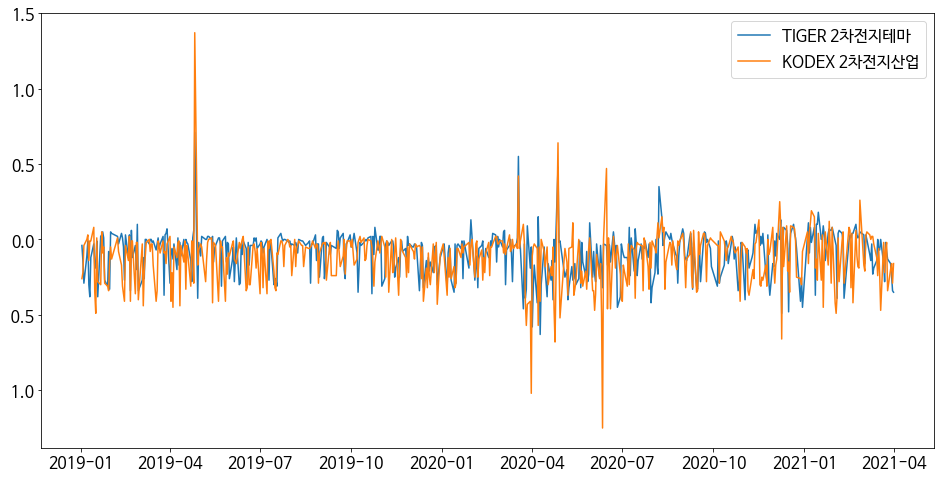

In [10]:
deviation = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  dev = stock.get_etf_price_deviation("20190101","202104016",b)
  deviation[a]=dev['괴리율'].values[:].tolist()
deviations = pd.DataFrame(deviation)
deviations.index = dev.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(deviations)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt